In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
from matplotlib.pyplot import figure

Загрузим данные

In [2]:
df = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-romanova-28/statistics/london.csv")

In [3]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


Проверим число наблюдений и столбцов, наличие пропусков и типы данных

In [4]:
df.shape

(17414, 10)

In [5]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [6]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

Перезагрузим данные с правильным типом данных для колонки timestamp

In [7]:
df = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-romanova-28/statistics/london.csv", parse_dates=['timestamp'])

In [8]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [9]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


Посмотрим на число поездок по датам и времени. Построим график, где по оси x – дата (timestamp), а по оси y – число поездок (cnt)

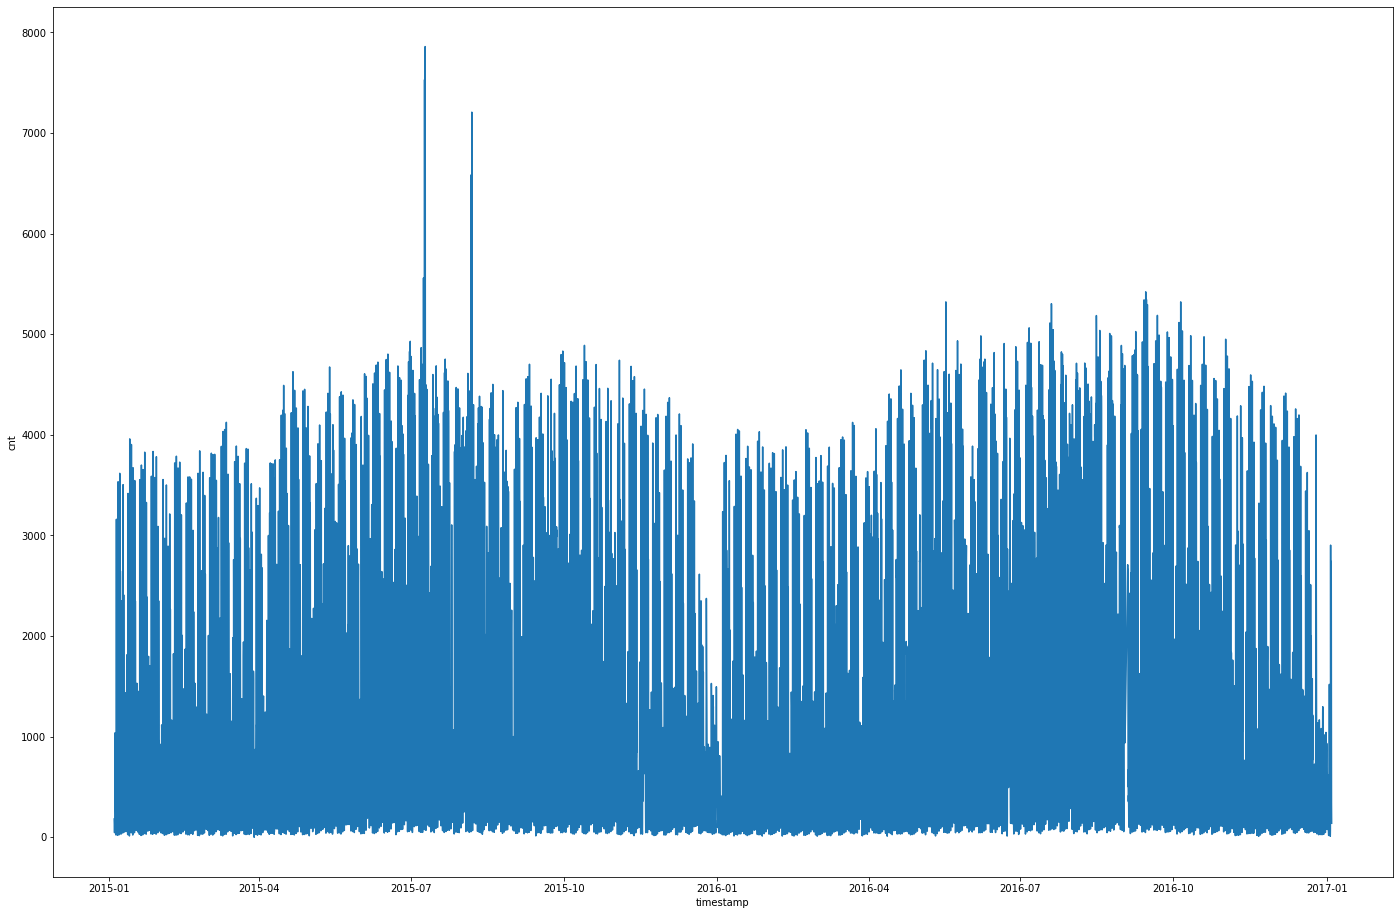

In [10]:
figure(figsize=(24, 16))
sns.lineplot(x='timestamp', y='cnt', data=df)

Очень сложно что-то понять по данному графику, нужно преобразовать данные, чтобы увидеть тренды

Агрегируем число поездок по дням и визуализируем результат

In [11]:
df_graf = df.sort_values('timestamp').set_index('timestamp')

In [12]:
df_graf.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


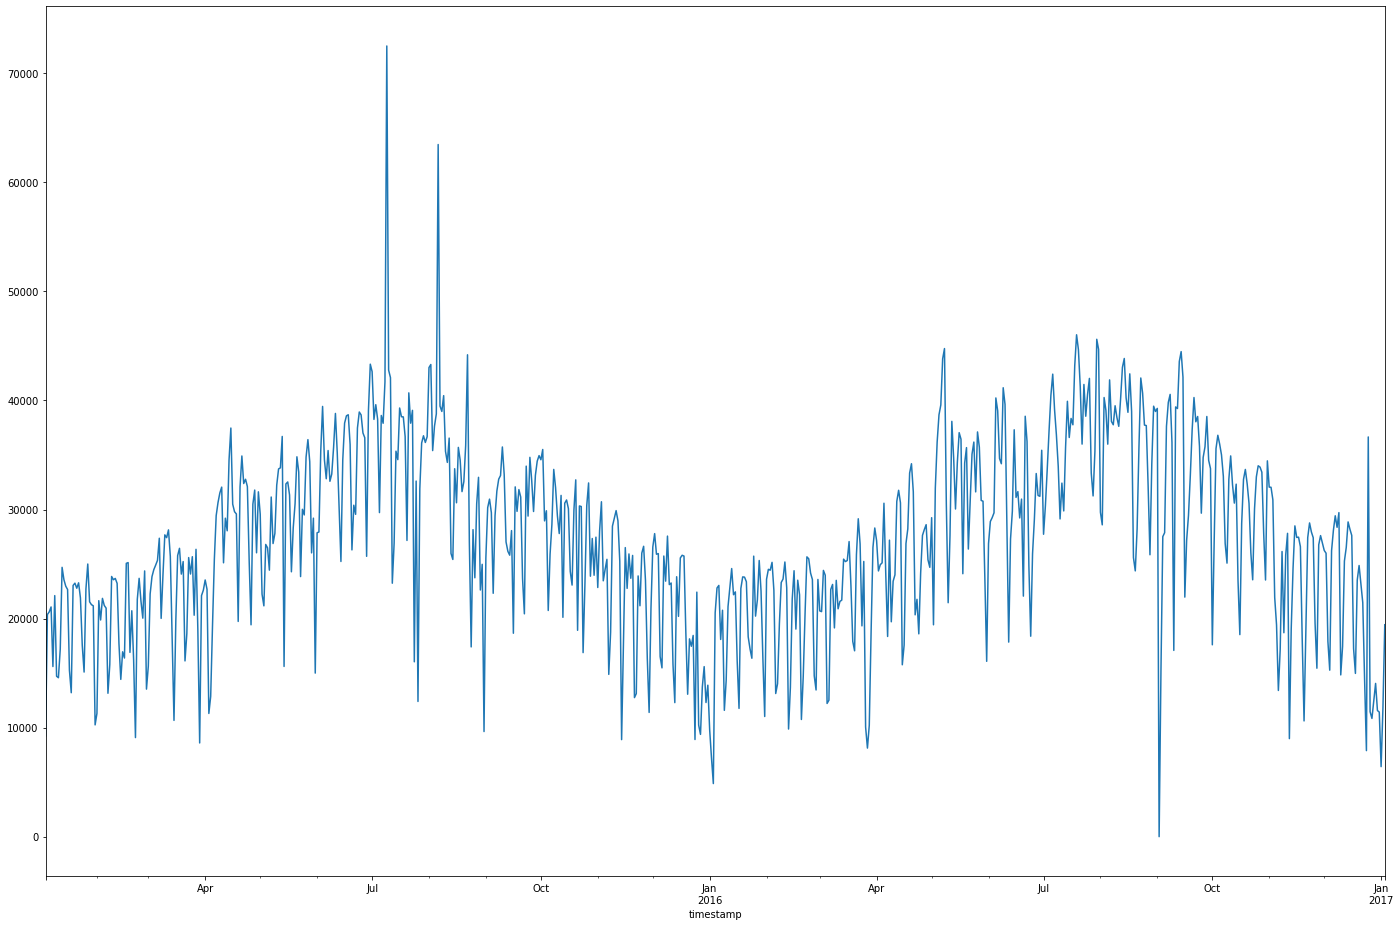

In [13]:
figure(figsize=(24, 16))
df_graf.resample(rule='D').cnt.sum().plot()

По графику видно:
- зимой число аренд меньше, чем летом
- встречаются как очень резкие скачки числа аренд, так и падения

Чтобы проверить скачки на графике, попробуем построить доверительный интервал вокруг данных - всё, что выпадает за его пределы, будет считаться аномалией. Так как мы работаем с временным рядом, построим доверительный интервал, используя скользящее среднее (чтобы не упустить важные характеристики данных, например, сезонные колебания)

In [14]:
df_agg_rolling = df_graf.resample(rule='D').cnt.sum().rolling(3).mean().reset_index()

In [15]:
df_agg_rolling.head()

,timestamp,cnt
0,2015-01-04,NaN
1,2015-01-05,NaN
2,2015-01-06,16739.666667
3,2015-01-07,20683.000000
4,2015-01-08,19092.666667


Теперь посчитаем разницу между наблюдаемыми и подсчитанными значениями. 

In [16]:
df_agg = df_graf.resample(rule='D').cnt.sum().reset_index()

In [17]:
df_agg.head()

,timestamp,cnt
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601


In [18]:
df_agg_rolling['cnt-cnt*'] = df_agg['cnt']-df_agg_rolling['cnt']

In [19]:
df_agg_rolling

,timestamp,cnt,cnt-cnt*
0,2015-01-04,NaN,NaN
1,2015-01-05,NaN,NaN
2,2015-01-06,16739.666667,3873.333333
3,2015-01-07,20683.000000,381.000000
4,2015-01-08,19092.666667,-3491.666667
...,...,...,...
726,2016-12-30,12682.000000,-1116.000000
727,2016-12-31,12347.333333,-923.333333
728,2017-01-01,9803.666667,-3382.666667
729,2017-01-02,9889.333333,1933.666667


Посмотрим на стандартное отклонение

In [20]:
std = np.std(df_agg_rolling['cnt-cnt*'])
std

4558.58664111794

Теперь определим границы интервалов. Для этого нужно взять данные, полученные при расчете скользящего среднего, и создать следующие объекты:
- upper_bound – верхняя граница; к скользящим средним прибавляем 2.576∗std
- lower_bound – нижняя граница; вычитаем 2.576∗std


In [21]:
df_agg_rolling['lower_bound'] = df_agg_rolling['cnt']-2.576*std
df_agg_rolling['upper_bound'] = df_agg_rolling['cnt']+2.576*std

In [22]:
df_agg_rolling

,timestamp,cnt,cnt-cnt*,lower_bound,upper_bound
0,2015-01-04,NaN,NaN,NaN,NaN
1,2015-01-05,NaN,NaN,NaN,NaN
2,2015-01-06,16739.666667,3873.333333,4996.747479,28482.585854
3,2015-01-07,20683.000000,381.000000,8940.080812,32425.919188
4,2015-01-08,19092.666667,-3491.666667,7349.747479,30835.585854
...,...,...,...,...,...
726,2016-12-30,12682.000000,-1116.000000,939.080812,24424.919188
727,2016-12-31,12347.333333,-923.333333,604.414146,24090.252521
728,2017-01-01,9803.666667,-3382.666667,-1939.252521,21546.585854
729,2017-01-02,9889.333333,1933.666667,-1853.585854,21632.252521


Выведем наблюдения, для которых наблюдаемые значения оказались больше верхней границы 99% доверительного интервала.

In [23]:
df_agg[df_agg['cnt']>df_agg_rolling['upper_bound']]

,timestamp,cnt
186,2015-07-09,72504
214,2015-08-06,63468
609,2016-09-04,27512
721,2016-12-25,36653


2015-07-09 значение числа аренд оказалось наибольшим. Просмотрем новости, можно определить,что наиболее вероятная причина столь резкого скачка - забастовки в метро

Посмотрим на даты, когда число аренд оказалось ниже ожидаемого.

In [24]:
df_agg[df_agg['cnt'] < df_agg_rolling['lower_bound']]

,timestamp,cnt
130,2015-05-14,15609
189,2015-07-12,23240
201,2015-07-24,16034
232,2015-08-24,17400
314,2015-11-14,8898
607,2016-09-02,0
615,2016-09-10,17080
621,2016-09-16,21967
678,2016-11-12,8990


Попробуем определить причину падения числа аренд 2016-09-02 и проверим исходные данные

In [25]:
df[df.timestamp >= "2016-09-02"]

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
14476,2016-09-03 12:00:00,2709,21.0,21.0,57.0,24.0,2.0,0.0,1.0,2.0
14477,2016-09-03 13:00:00,2382,20.0,20.0,64.0,24.0,4.0,0.0,1.0,2.0
14478,2016-09-03 14:00:00,2528,20.0,20.0,64.0,19.0,7.0,0.0,1.0,2.0
14479,2016-09-03 15:00:00,2663,21.0,21.0,60.0,26.0,2.0,0.0,1.0,2.0
14480,2016-09-03 16:00:00,1728,21.0,21.0,64.0,26.0,7.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


Выявлена ошибка при сборе данных